In [1]:
# importing server connection
!pip install tableau_api_lib

# Tableau API Lib Library
from tableau_api_lib import TableauServerConnection
# importing useful querying functions packed into pandas df
from tableau_api_lib.utils import querying

#nested columns
from tableau_api_lib.utils import flatten_dict_column

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.0/144.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.2 MB/s eta 0:00:00


In [2]:
# Exposing all info-Hide them # Use envs
# you can do for tableau_server as well
config={
    'tableau_online':{
        'server':'https://10ax.online.tableau.com/',
        'api_version':'3.10',
        'personal_access_token_name':'sahil',
        'personal_access_token_secret':'Z8B50kwuRWOrcAHzrBF5xg==:g8kaqTRBD3ivrlNGWmYXiTCJgW9AkVEi',
        'site_name':'sahiltest',
        'site_url':'sahiltest'
    }
}
conn=TableauServerConnection(config,env='tableau_online')
conn.sign_in()

/usr/local/lib/python3.10/dist-packages/tableau_api_lib/decorators/verification.py:144: UserWarning: 
                    The Tableau Server REST API version you specified is lower than the version your server uses.
                    Your Tableau Server is on REST API version 3.21.
                    The REST API version you specified is 3.10.
                    For optimal results, please change the 'api_version' config variable to 3.21.
                    
  warnings.warn(


<Response [200]>

In [ ]:
# Steps for adding a subscription
# 1. Which user will receive the subscription
# 2. Which piece of content will they receive
# 3. which content variety is this (view or workbook)
# 4. which is the ID value of content
# 5. On what schedule will this subscription run

Get user Id of users

In [3]:
res=querying.get_users_dataframe(conn)

In [4]:
res

domain       authSetting                      email  \
0  {'name': 'TABID_WITH_MFA'}  TableauIDWithMFA  officialhksahil@gmail.com   
1  {'name': 'TABID_WITH_MFA'}  TableauIDWithMFA                b@gmail.com   
2  {'name': 'TABID_WITH_MFA'}  TableauIDWithMFA               bb@gmail.com   

                                  externalAuthUserId         fullName  \
0  53bf8b03a7327a48f955cf6d805c12c26a99fc407d5b41...  Sahil Choudhary   
1  afbc34416ac6e7fbb97331a21fa2823f56952c0796a615...    . b@gmail.com   
2  1f3242ac7fbb9c5adffe8d69934d3be5493cbf753a6cd9...         John Doe   

                                     id             lastLogin  \
0  a20ef2bb-7644-468e-a388-82e24b33fb78  2023-09-08T10:35:40Z   
1  62e2207e-5004-4351-9053-84cb97a7a4d1                   NaN   
2  1d546da7-0f30-4f5a-8b53-9c79f311bac0                   NaN   

                        name                  siteRole locale language  
0  officialhksahil@gmail.com  SiteAdministratorCreator              en  
1                b@gmail.com                Unlicensed              en  
2               bb@gmail.com                Unlicensed              en

In [5]:
user_id='a20ef2bb-7644-468e-a388-82e24b33fb78'

Get list of all the dashboards (views) on site

In [6]:
res=querying.get_views_dataframe(conn)

In [7]:
#ignore stories, sheets
dashboards_df=res[res['sheetType']=='dashboard']

In [8]:
dashboards_df.head(1)

workbook  \
0  {'tags': {}, 'id': 'fcfb1250-77a5-452d-9906-c7...   

                                               owner  \
0  {'email': 'officialhksahil@gmail.com', 'fullNa...   

                                             project tags  \
0  {'id': 'a28292a0-3eb1-47c7-88fd-b1b25896ffae',...   {}   

                                     id      name                  contentUrl  \
0  0fa96c8b-f9fd-4f93-8c02-efbb5732416c  Overview  Superstore/sheets/Overview   

              createdAt             updatedAt  sheetType favoritesTotal  \
0  2023-09-04T05:47:20Z  2023-09-04T05:47:20Z  dashboard              0   

  viewUrlName usage_totalViewCount  
0    Overview                    1

In [ ]:
# Grab the dashboard id 0fa96c8b-f9fd-4f93-8c02-efbb5732416c

In [9]:
schedules=querying.get_schedules_dataframe(conn)

In [10]:
schedules.head(5)

id  \
0  e04f23a7-8d82-49c9-b6a8-97bb1b6dc56a   
1  a22ee3a4-f42f-4f49-9fd3-bfd1241248b9   
2  767062af-287c-4124-880d-ac93dac6e4db   
3  3e0c4f8f-a1b3-48c6-af92-69cb8b2b4187   
4  d4dcb58e-0def-4508-944f-c394354dab41   

                                        name   state priority  \
0                           Weekday mornings  Active       50   
1                             Monday morning  Active       50   
2  Refresh daily [03:00 - 05:00, Pacific US]  Active       50   
3  Refresh daily [04:00 - 06:00, Pacific US]  Active       50   
4  Refresh daily [06:00 - 08:00, Pacific US]  Active       50   

              createdAt             updatedAt          type frequency  \
0  2014-12-02T20:43:08Z  2023-04-18T13:00:29Z  Subscription    Weekly   
1  2014-12-02T20:43:08Z  2023-04-17T13:00:40Z  Subscription    Weekly   
2  2016-06-15T17:37:19Z  2023-04-20T10:00:08Z       Extract     Daily   
3  2016-06-15T17:37:35Z  2023-04-20T11:00:05Z       Extract     Daily   
4  2016-06-15T17:37:54Z  2023-04-18T13:00:29Z       Extract     Daily   

              nextRunAt  
0  2023-09-08T13:00:00Z  
1  2023-09-11T13:00:00Z  
2  2023-09-09T10:00:00Z  
3  2023-09-08T11:00:00Z  
4  2023-09-08T13:00:00Z

In [11]:
schedule_df=schedules[schedules['type']=='Subscription']

In [ ]:
# Grab the schedule id d4dcb58e-0def-4508-944f-c394354dab41

Create Subscription

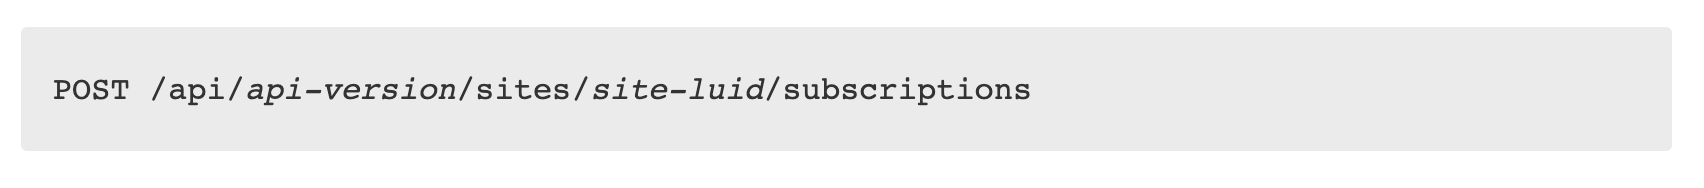

In [12]:
subject='Here is your report'

In [13]:
res=conn.create_subscription(
    subscription_subject=subject,
    user_id='a20ef2bb-7644-468e-a388-82e24b33fb78',
    content_type='view',
    content_id='0fa96c8b-f9fd-4f93-8c02-efbb5732416c',
    schedule_id='a22ee3a4-f42f-4f49-9fd3-bfd1241248b9',
    attach_pdf_flag='True'
)

In [14]:
res.json()

{'subscription': {'content': {'id': '0fa96c8b-f9fd-4f93-8c02-efbb5732416c',
   'type': 'View',
   'sendIfViewEmpty': True},
  'schedule': {'id': 'a22ee3a4-f42f-4f49-9fd3-bfd1241248b9',
   'name': 'Monday morning'},
  'user': {'id': 'a20ef2bb-7644-468e-a388-82e24b33fb78',
   'name': 'officialhksahil@gmail.com'},
  'id': '8d0b3dc2-c49f-40e9-a20e-a1d2cb2ed876',
  'subject': 'Here is your report',
  'attachImage': False,
  'attachPdf': True,
  'suspended': False,
  'pageOrientation': 'PORTRAIT',
  'pageSizeOption': 'LETTER'}}

Get all the subscriptions in the site

In [15]:
querying.get_subscriptions_dataframe(conn)

id              subject  attachImage  \
0  cef6a616-b79a-429d-9439-8d28c3fe6e76     Tables Catalogue         True   
1  e7a0c197-9218-494d-ab3b-fded2b27d2d2         Test Subject         True   
2  6dadae33-2a56-455b-aea9-3384be04e399             Overview         True   
3  ba1ca6f1-835d-44ee-88e9-579735ee3d97             Overview         True   
4  8d0b3dc2-c49f-40e9-a20e-a1d2cb2ed876  Here is your report        False   

   attachPdf  suspended           message pageOrientation pageSizeOption  \
0      False      False               NaN             NaN            NaN   
1      False      False  Test Description             NaN            NaN   
2      False      False               NaN             NaN            NaN   
3      False      False               NaN             NaN            NaN   
4       True      False               NaN        PORTRAIT         LETTER   

                             content_id content_type  \
0  ee4a1885-386b-47bf-86b0-d713280b3961         View   
1  0fa96c8b-f9fd-4f93-8c02-efbb5732416c         View   
2  cc0d1843-c7f1-4f81-b1ba-7ad3104a1a44     Workbook   
3  fc6a7b46-3c4b-4ea0-a086-4aa6c8870b46         View   
4  0fa96c8b-f9fd-4f93-8c02-efbb5732416c         View   

                            schedule_id  \
0  70e2f308-17f4-412f-addd-840a3f7604a8   
1  70e2f308-17f4-412f-addd-840a3f7604a8   
2  d7325d3e-3327-4d32-b334-cb268d3b15d7   
3  de09f175-e002-42f9-9136-32c44db7f182   
4  a22ee3a4-f42f-4f49-9fd3-bfd1241248b9   

                              schedule_name  \
0  SSS_1e808af4-be0a-42b1-84da-d6a4414f8dc4   
1  SSS_1e808af4-be0a-42b1-84da-d6a4414f8dc4   
2  SSS_b184d905-6f5a-4dd1-976d-a06b4da3e7ea   
3  SSS_ad1b4e0e-2df5-4add-8bd4-dffae566eec7   
4                            Monday morning   

                                user_id                  user_name  
0  a20ef2bb-7644-468e-a388-82e24b33fb78  officialhksahil@gmail.com  
1  a20ef2bb-7644-468e-a388-82e24b33fb78  officialhksahil@gmail.com  
2  a20ef2bb-7644-468e-a388-82e24b33fb78  officialhksahil@gmail.com  
3  a20ef2bb-7644-468e-a388-82e24b33fb78  officialhksahil@gmail.com  
4  a20ef2bb-7644-468e-a388-82e24b33fb78  officialhksahil@gmail.com

Delete the subscription

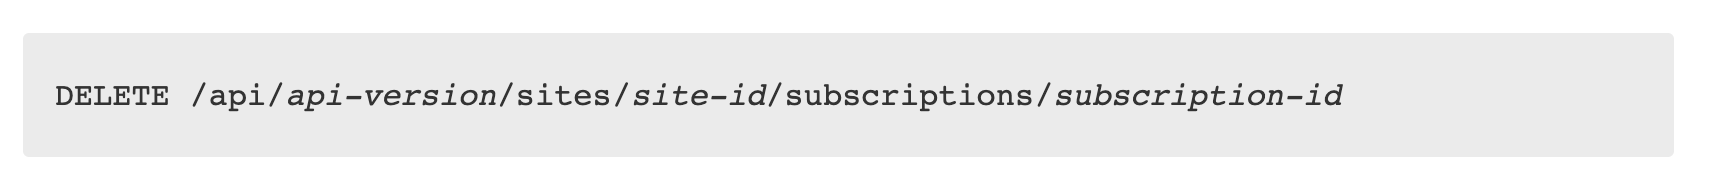

In [ ]:
# Deletes the specified subscription on Tableau Server or Tableau Cloud.

# End Point -> delete_subscription

In [16]:
res=conn.delete_subscription(subscription_id='8d0b3dc2-c49f-40e9-a20e-a1d2cb2ed876')

In [17]:
res.json()

JSONDecodeError: ignored

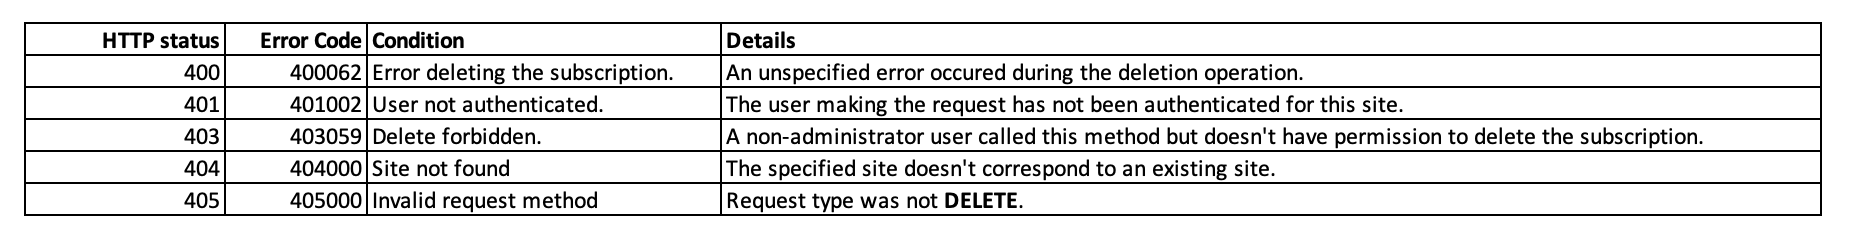